<a href="https://colab.research.google.com/github/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/blob/main/DA310_Multiple_Linear_Regression_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics


**Plan**

Display sample data and summary

Observe data in graphical form to draw conclusions about distribution and linear form

Calculate normality p-value

Calculate lineral regression model and display values

Display regression summary

Display scatterplot again with calculated regression line

Compare actual and predicted values to determine accuracy of the linear regression equation

In [23]:
#Read this csv file from GitHub into Jupyter Notebook.
realestate = pd.read_csv(r"https://raw.githubusercontent.com/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/df8e8dd993d0432fd66911aa7b6c76a268943554/Real_estate.csv")
#Check data head
realestate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [58]:
#Move data from dataset into 4 series
PurchaseDate = realestate['X1 transaction date']
HouseAge = realestate['X2 house age']
MRTStation = realestate['X3 distance to the nearest MRT station']
NumberOfStores = realestate['X4 number of convenience stores']
HousePrice = realestate['Y house price of unit area']


In [10]:
#Summary of all fields
realestate.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


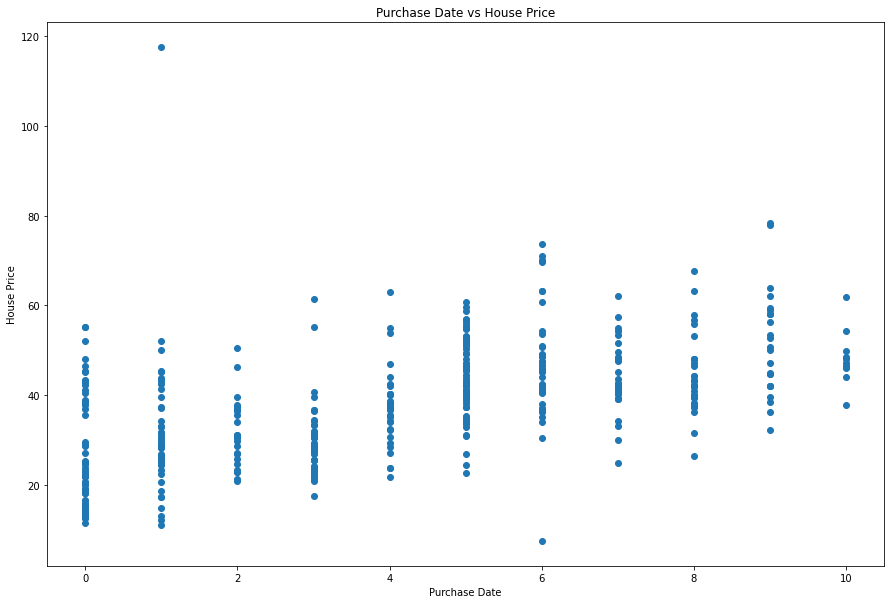

In [32]:
#Set size of scatterplot
f, ax = plt.subplots(1, 1, figsize = (15, 10))

#Initial Scatter Plot - Scatterplot #1
#plt.scatter(PurchaseDate, HousePrice)
#plt.scatter(HouseAge, HousePrice)
#plt.scatter(MRTStation, HousePrice)
plt.scatter(NumberOfStores, HousePrice)

#Add labels
plt.title("Purchase Date vs House Price")
plt.xlabel("Purchase Date")
plt.ylabel("House Price")
plt.show()

In [34]:
#Normality Check - P-value
stat, p = stats.normaltest(PurchaseDate)
print('p-value:', p)
stat, p = stats.normaltest(HouseAge)
print('p-value:', p)
stat, p = stats.normaltest(PurchaseDate)
print('p-value:', p)
stat, p = stats.normaltest(MRTStation)
print('p-value:', p)
stat, p = stats.normaltest(NumberOfStores)
print('p-value:', p)

p-value: 2.560773996227825e-69
p-value: 8.253756825552855e-13
p-value: 2.560773996227825e-69
p-value: 1.1456738526889203e-34
p-value: 9.537392010227493e-26


In [ ]:
#set the Linear Regression model
model = LinearRegression()

#Pivot the years of experience and convert to list
ExperiencePivot = np.array(salary['YearsOfExperience']).reshape(-1,1).tolist()

#Fit the pivoted experience to the annual salary
model.fit(ExperiencePivot, AnnualSalary)

#Get the Coefficient of Determination
r_sq = model.score(ExperiencePivot,AnnualSalary)

#Get the Coefficent for the formula.
#    "coef_" comes through as an array with 1 element. Take that 1 element, instead of an array.
salCoef = model.coef_[0]

#Get the Y-intercept value
salIntercept = model.intercept_

In [63]:
#set the Linear Regression model
model = LinearRegression()

#Choice variables
MultiVarChoices = realestate[['X3 distance to the nearest MRT station', 'X4 number of convenience stores']]

#Fit the our choices to house prices
model.fit(MultiVarChoices, HousePrice)

#Get the Coefficient of Determination
r_sq = model.score(MultiVarChoices, HousePrice)

#Get the Coefficent for the formula.
#    "coef_" comes through as an array with 1 element. Take that 1 element, instead of an array.
salCoef = model.coef_

#Get the Y-intercept value
salIntercept = model.intercept_

In [64]:
#Output formula variables for regression analysis.
print('Coefficient of Determination:', r_sq)
print('Intercept:', salIntercept)
print('Slope:', salCoef)

Coefficient of Determination: 0.49656835105076846
Intercept: 39.122902690543846
Slope: [-0.00557801  1.19759904]


In [69]:
#Create a function to calculate salary based on experience. 
def returnPrice(coef, vars, intercept):
     j = coef[0] * vars[0] + coef[1] * vars[1] + intercept
     return j

#Test function - format returned value as US currency.
print("${:,.2f}".format(returnPrice(salCoef, [2175.03, 7.1], salIntercept)))

predictedPrice = returnPrice(salCoef, [MRTStation, NumberOfStores], salIntercept)


$35.49
0      50.625438
1      48.191106
2      41.976144
3      41.976144
4      42.932304
         ...    
409    16.353391
410    49.396729
411    45.325264
412    44.526266
413    49.396729
Length: 414, dtype: float64


In [71]:
#Sample data output
print('MRT Distance'.ljust(11), 'Number of'.ljust(14), 'Actual'.ljust(14), 'Predicted'.ljust(14))
print(''.ljust(11), 'Stores'.ljust(14), 'Price'.ljust(14), 'Price'.ljust(14))
for i in [0,1,2,3,4,95,96,97,98,99]:

    print(str(MRTStation[i]).ljust(11), 
             str(NumberOfStores[i]).ljust(11), 
             "${:,.2f}".format(HousePrice[i]).ljust(14),
             "${:,.2f}".format(predictedPrice[i]).ljust(14)
         )

MRT Distance Number of      Actual         Predicted     
            Stores         Price          Price         
84.87882    10          $37.90         $50.63        
306.5947    9           $42.20         $48.19        
561.9845    5           $47.30         $41.98        
561.9845    5           $54.80         $41.98        
390.5684    5           $43.10         $42.93        
104.8101    5           $51.80         $44.53        
90.45606    9           $59.50         $49.40        
617.4424    3           $34.60         $39.27        
289.3248    5           $51.00         $43.50        
90.45606    9           $62.20         $49.40        
